Analysis: 

Urban cities had significantly more number of rides per city than suburban or rural cities. The pool of drivers was also greater which likely contributed to lower fares in urban cities on average than suburban or rural cities, as there was more supply. 

Based on the bubble chart, most of the suburban cities had the same number of rides as some urban cities (~10-30 rides), but the average fares was higher than most urban areas. 

Although most of Pyber’s drivers are in urban cities (86.7%), as opposed to 12.5% for suburban areas and 0.8% for rural cities, only 62.7% of the total fares are from urban areas. Rural cities didn’t have many drivers per city but was still able to generate 6.8% of the total fares and 5.3% of total rides. 

In [57]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_and_ride_data = ride_data_df.merge(city_data_df, on="city", how="inner")

# Display the data table for preview
city_and_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

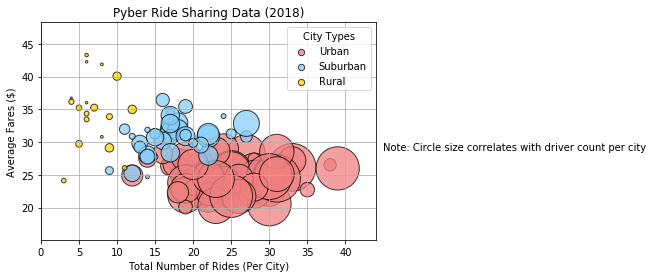

In [188]:
# Obtain the x and y coordinates for each of the three city types

#Separate data by city type
urban_city = city_and_ride_data.loc[city_and_ride_data["type"]=="Urban"]
suburban_city = city_and_ride_data.loc[city_and_ride_data["type"]=="Suburban"]
rural_city = city_and_ride_data.loc[city_and_ride_data["type"]=="Rural"]

#Create groups based on city for each city type
urban_group_data = urban_city.groupby(["city"])
suburban_group_data = suburban_city.groupby(["city"])
rural_group_data = rural_city.groupby(["city"])

#Average Fares Per City for each city type
urban_avg_fares = urban_group_data["fare"].mean()
suburban_avg_fares = suburban_group_data["fare"].mean()
rural_avg_fares = rural_group_data["fare"].mean()

#Get the number of rides per city by city type
urban_ride_count = urban_group_data["ride_id"].count()
suburban_ride_count = suburban_group_data["ride_id"].count()
rural_ride_count = rural_group_data["ride_id"].count()

#Get the total number of drivers per city
urban_drivers_count = urban_group_data["driver_count"].sum()
suburban_drivers_count = suburban_group_data["driver_count"].sum()
rural_drivers_count = rural_group_data["driver_count"].sum()

#Build the scatter plots for each city types
urban_plot = plt.scatter(urban_ride_count, urban_avg_fares, marker="o", facecolors="lightcoral", 
                         edgecolors="black", s=urban_drivers_count,alpha=0.75)
suburban_plot = plt.scatter(suburban_ride_count, suburban_avg_fares, marker="o", facecolors="lightskyblue", 
                            edgecolors="black", s=suburban_drivers_count,alpha=0.75)
rural_plot = plt.scatter(rural_ride_count, rural_avg_fares, marker="o", facecolors="gold", 
                         edgecolors="black", s=rural_drivers_count,alpha=0.75)

# Incorporate the other graph properties
# Add title, x, and y axis labels
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fares ($)")
plt.title("Pyber Ride Sharing Data (2018)")

# add x and y number limits
plt.xlim(0,max(urban_ride_count)+5)
plt.ylim(min(urban_avg_fares)-5,max(rural_avg_fares)+5)
plt.grid()

# Create a legend
legend = plt.legend(handles = (urban_plot, suburban_plot, rural_plot), labels = ("Urban","Suburban","Rural"),
        title="City Types",loc="best")
for handle in legend.legendHandles:
    handle.set_sizes([40.0])

# Incorporate a text label regarding circle size
plt.text(45,30, 'Note: Circle size correlates with driver count per city', 
         horizontalalignment='left', verticalalignment='top')

# Save Figure and show plot
plt.savefig("PyberBubbleChart.png")
plt.show()

## Total Fares by City Type

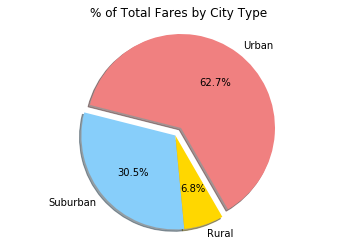

In [176]:
#Calculate the total fares by city type
urban_fares_total = urban_city["fare"].sum() 
suburban_fares_total = suburban_city["fare"].sum() 
rural_fares_total = rural_city["fare"].sum() 

#Store total fares into a list
fares_by_city = [urban_fares_total,suburban_fares_total,rural_fares_total]

#Create labels
labels = ["Urban", "Suburban", "Rural"]

#Size
colors = ["lightcoral", "lightskyblue", "gold"]

#Explode the urban pie
explode = [0.1,0,0]

# Build Pie Chart
plt.pie(fares_by_city, explode = explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, 
        startangle=300)

# Add title and make axis equal
plt.title("% of Total Fares by City Type")
plt.axis("equal")

# Save Figure and Show Plot
plt.savefig("PyberFaresPieChart.png")
plt.show()

## Total Rides by City Type

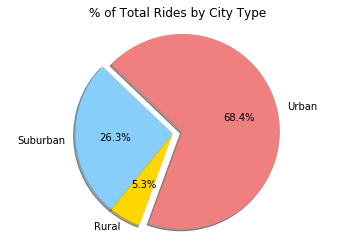

In [184]:
#Calculate the total rides by city type
urban_ride_total = urban_city["ride_id"].count() 
suburban_ride_total = suburban_city["ride_id"].count() 
rural_ride_total = rural_city["ride_id"].count() 

#Store total fares into a list
rides_by_city = [urban_ride_total,suburban_ride_total,rural_ride_total]

#Create labels
labels = ["Urban", "Suburban", "Rural"]

#Size
colors = ["lightcoral", "lightskyblue", "gold"]

#Explode the urban pie
explode = [0.1,0,0]

# Build Pie Chart
plt.pie(rides_by_city, explode = explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, 
        startangle=250)

# Add title and make axis equal
plt.title("% of Total Rides by City Type")
plt.axis("equal")

# Save Figure and Show Plot
plt.savefig("PyberRidePieChart.png")
plt.show()

## Total Drivers by City Type

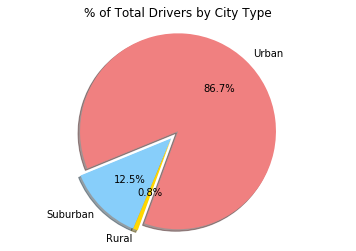

In [185]:
#Calculate the total drivers by city type
urban_driver_total = urban_city["driver_count"].sum() 
suburban_driver_total = suburban_city["driver_count"].sum() 
rural_driver_total = rural_city["driver_count"].sum() 

#Store total fares into a list
rides_by_city = [urban_driver_total,suburban_driver_total,rural_driver_total]

#Create labels
labels = ["Urban", "Suburban", "Rural"]

#Size
colors = ["lightcoral", "lightskyblue", "gold"]

#Explode the urban pie
explode = [0.1,0,0]

# Build Pie Chart
plt.pie(rides_by_city, explode = explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, 
        startangle=250)

# Add title and make axis equal
plt.title("% of Total Drivers by City Type")
plt.axis("equal")

# Save Figure and Show Plot
plt.savefig("PyberDriverPieChart.png")
plt.show()